# This explores the data set

In [24]:
import requests
import pandas as pd
import seaborn as sns
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("../data/all/pokemon_data_all.csv")
df.head()

,name,type_1,type_2,height,weight,hp,attack,defense,special-attack,special-defense,speed
0,bulbasaur,grass,poison,7,69,45,49,49,65,65,45
1,ivysaur,grass,poison,10,130,60,62,63,80,80,60
2,venusaur,grass,poison,20,1000,80,82,83,100,100,80
3,charmander,fire,None,6,85,39,52,43,60,50,65
4,charmeleon,fire,None,11,190,58,64,58,80,65,80


In [6]:
df.describe()

,height,weight,hp,attack,defense,special-attack,special-defense,speed
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.467742,980.863287,71.264977,81.580645,75.241935,73.649002,72.966974,71.156682
std,54.180316,1972.645170,26.764202,31.673015,30.492559,32.469611,27.358069,30.310259
min,1.000000,0.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,5.000000,89.250000,54.000000,58.000000,53.000000,50.000000,52.000000,48.000000
50%,10.000000,315.500000,70.000000,80.000000,70.000000,65.000000,70.000000,70.000000
75%,16.000000,818.000000,85.000000,100.000000,95.000000,95.000000,90.000000,92.000000
max,1000.000000,10000.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


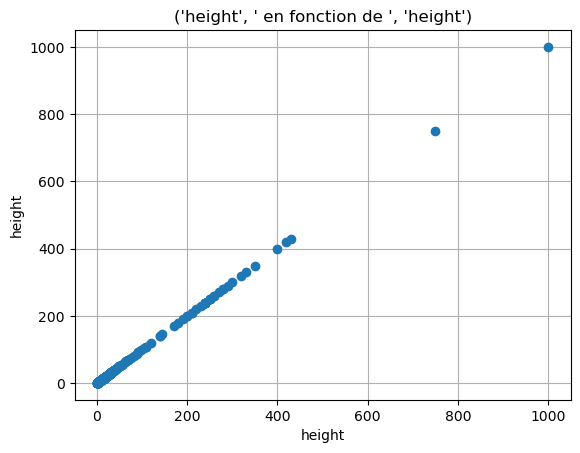

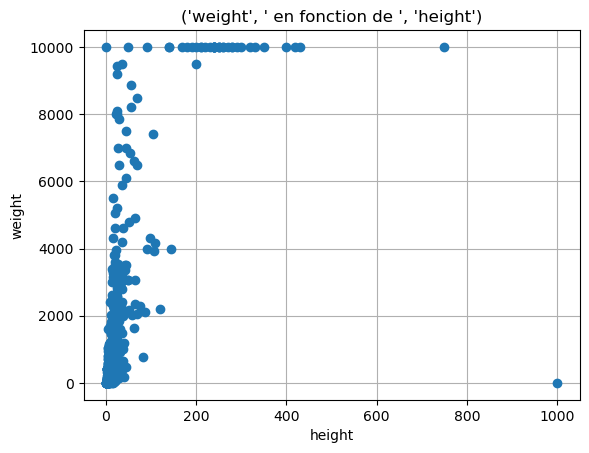

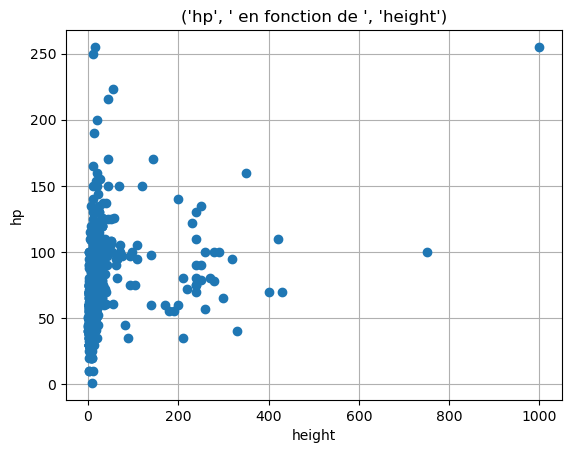

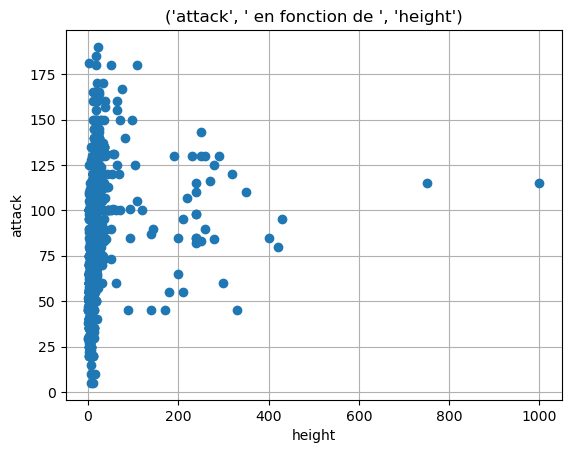

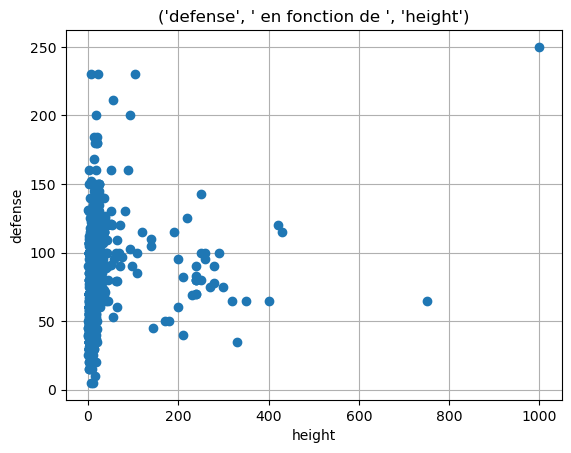

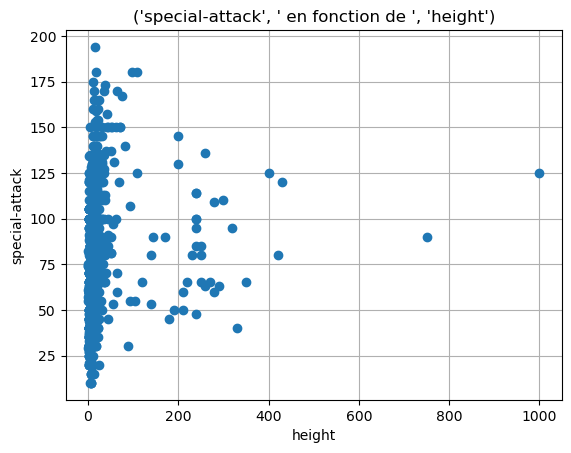

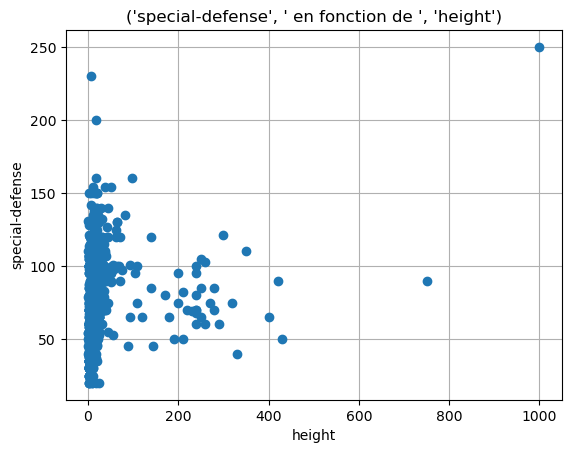

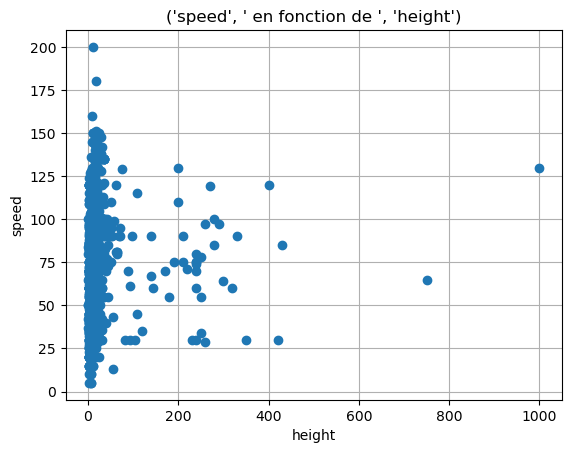

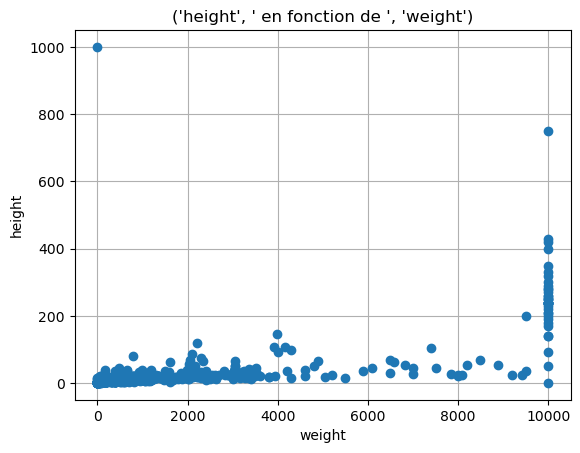

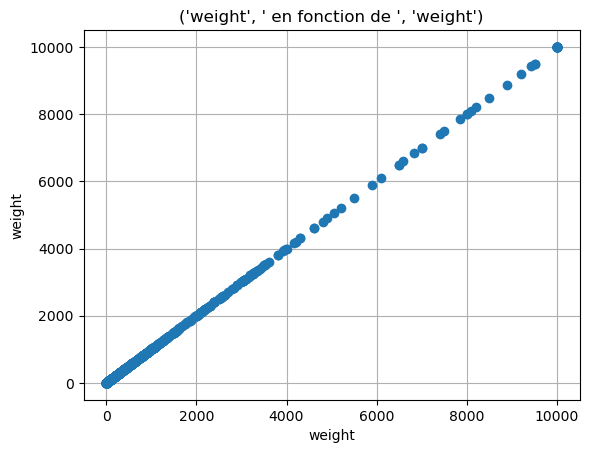

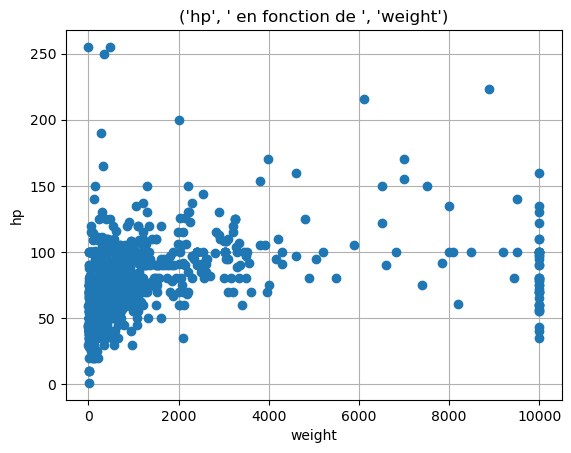

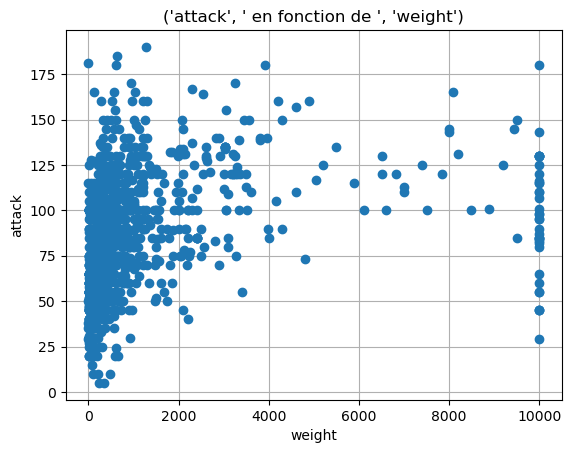

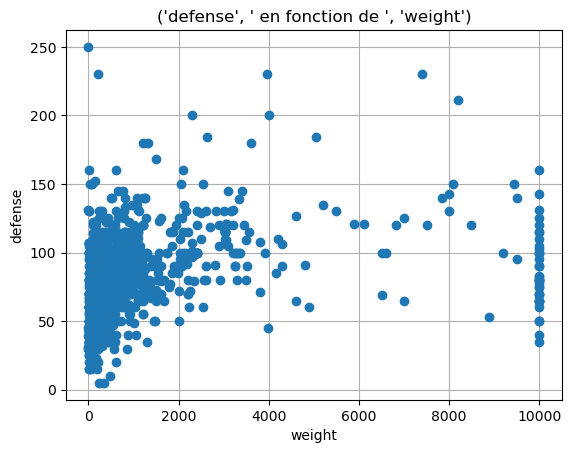

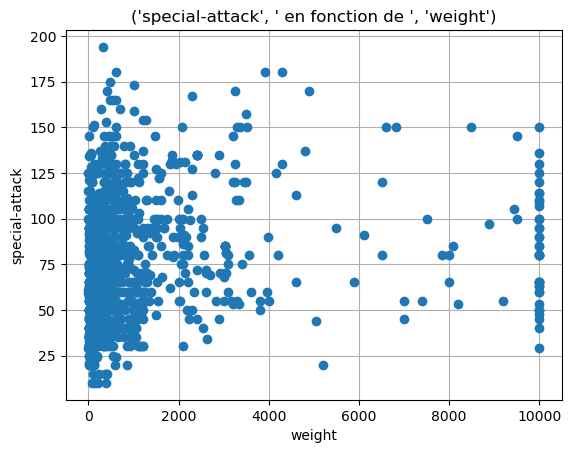

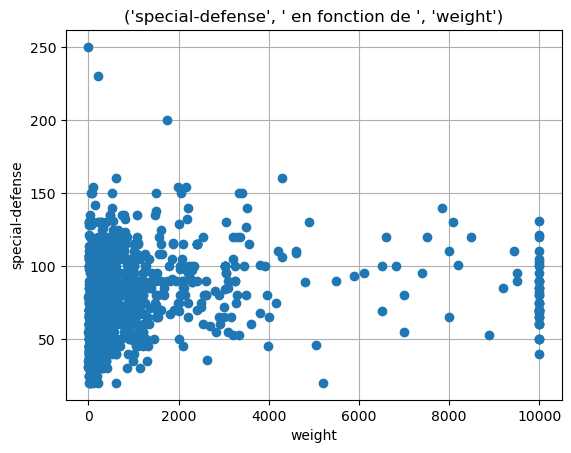

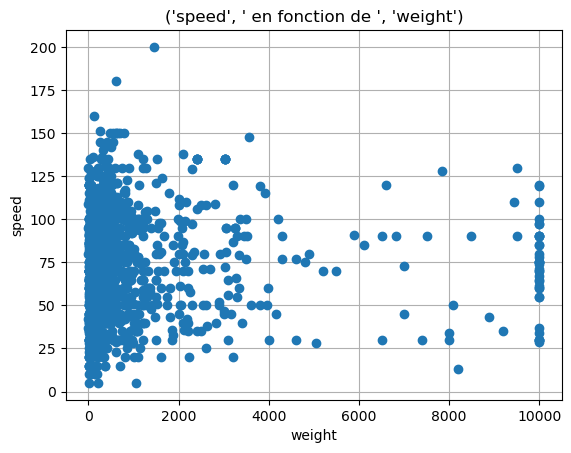

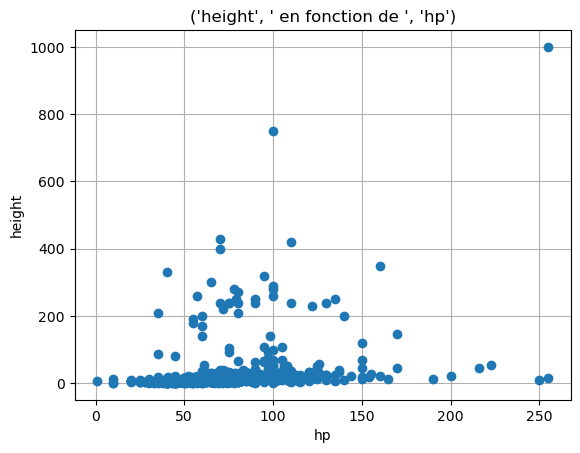

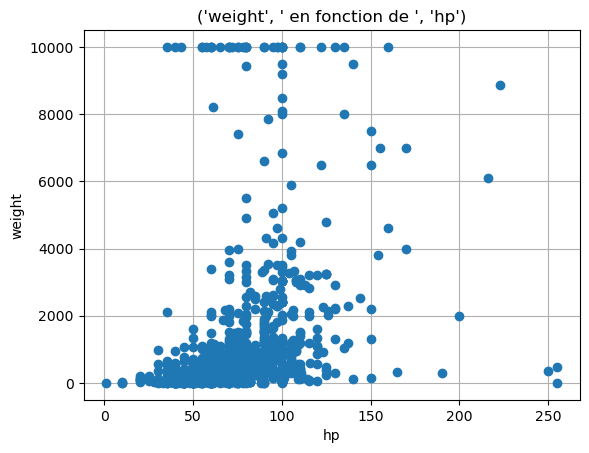

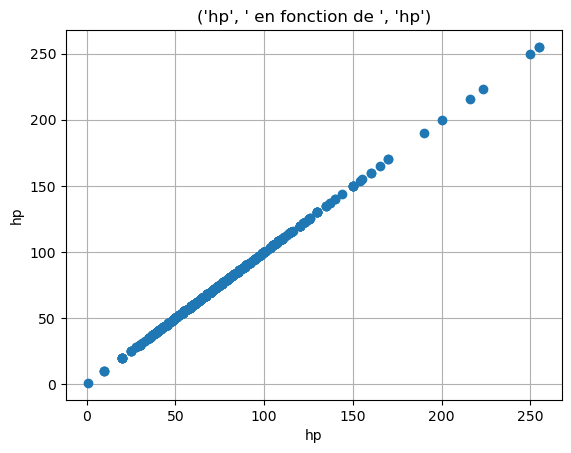

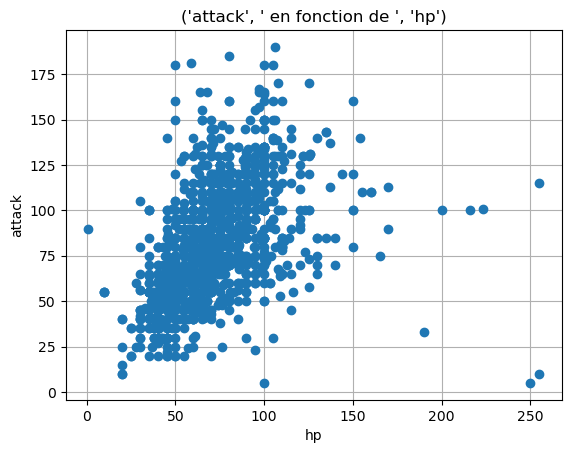

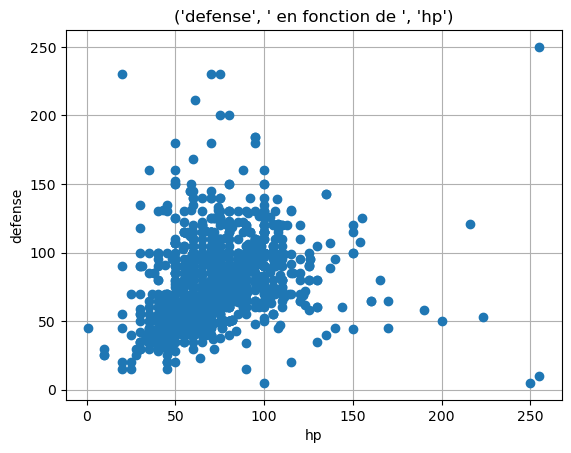

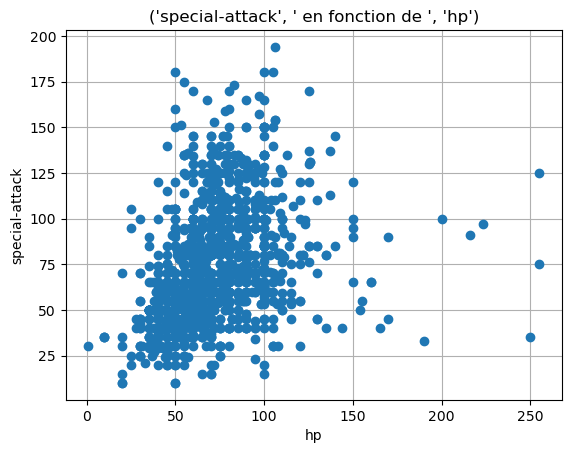

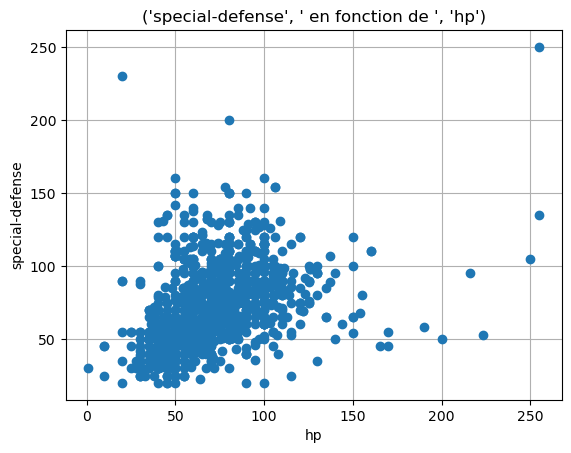

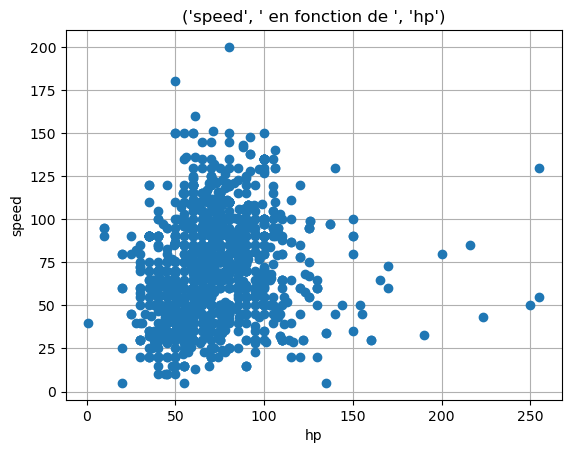

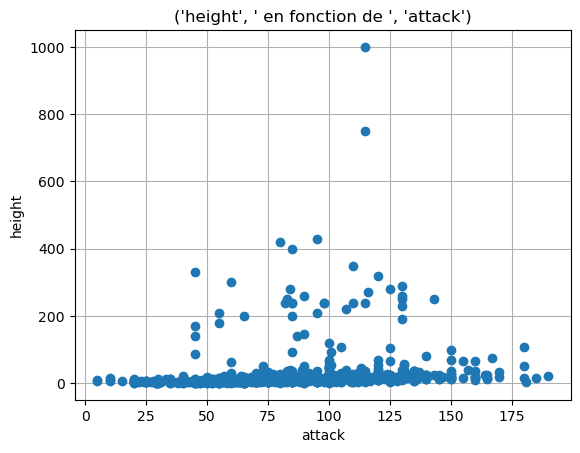

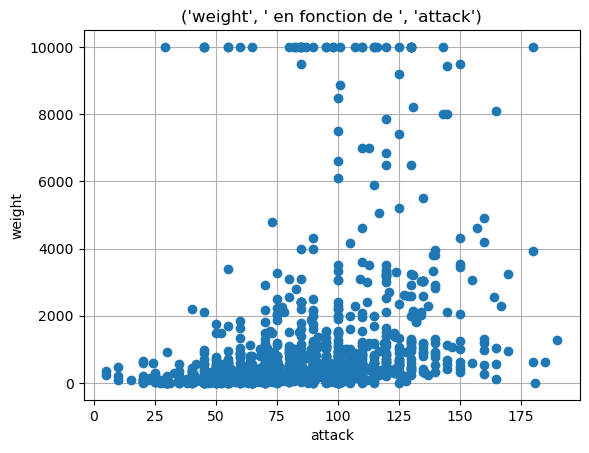

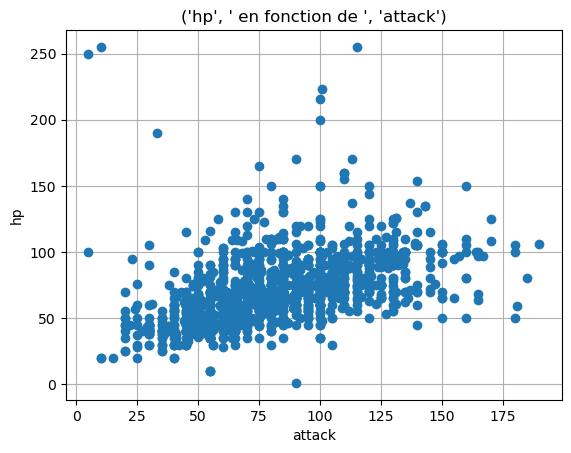

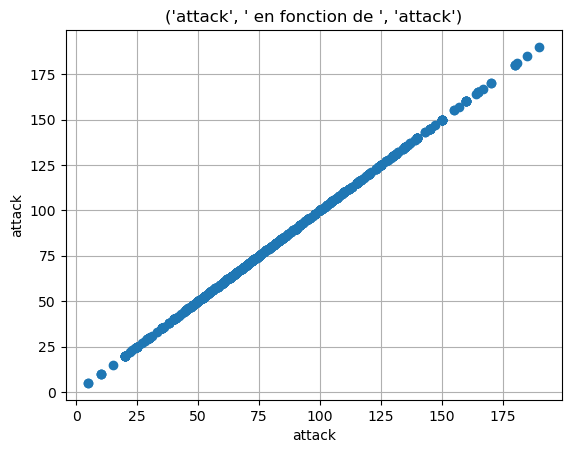

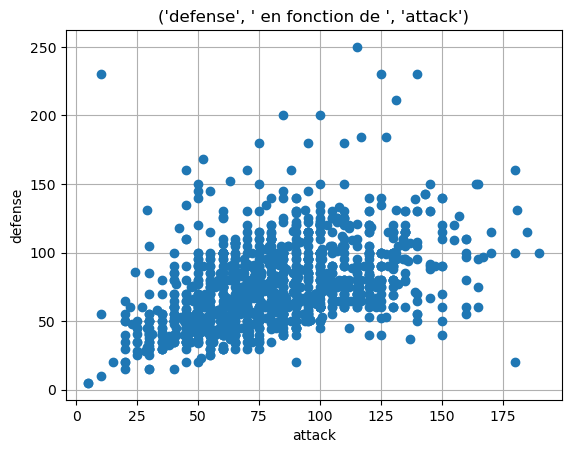

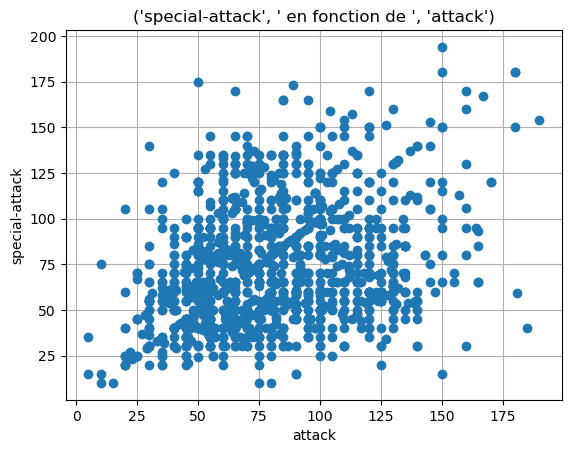

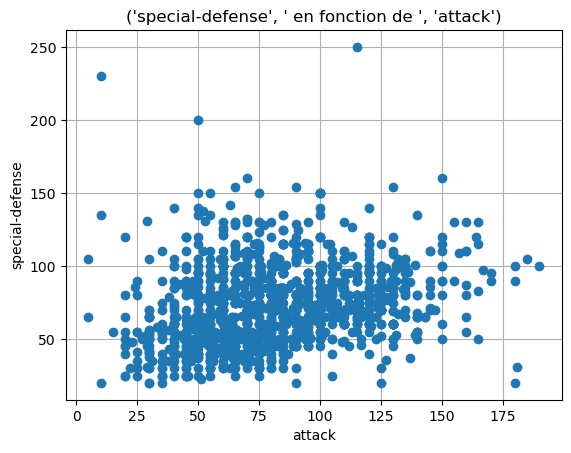

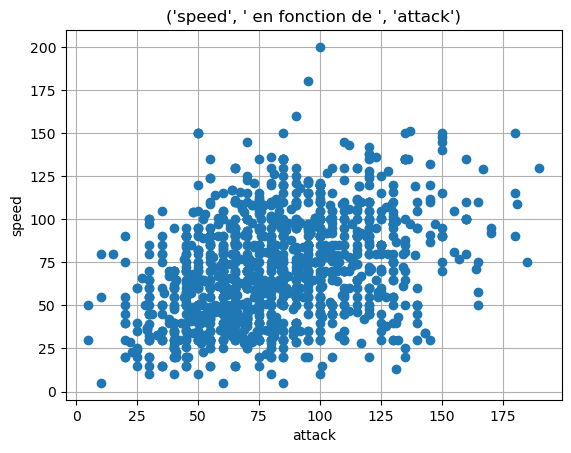

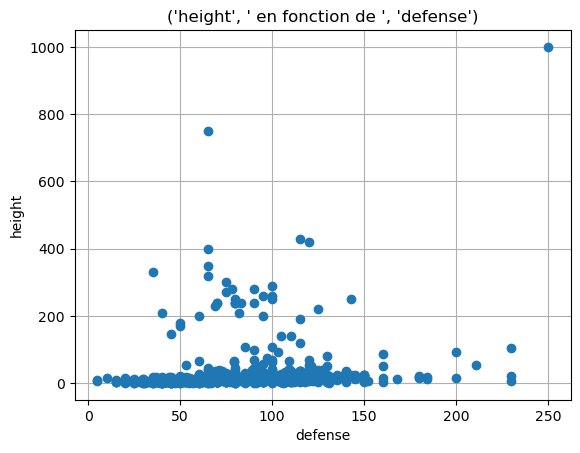

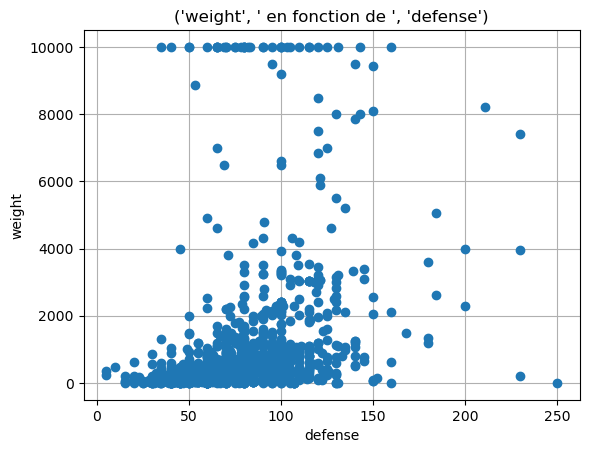

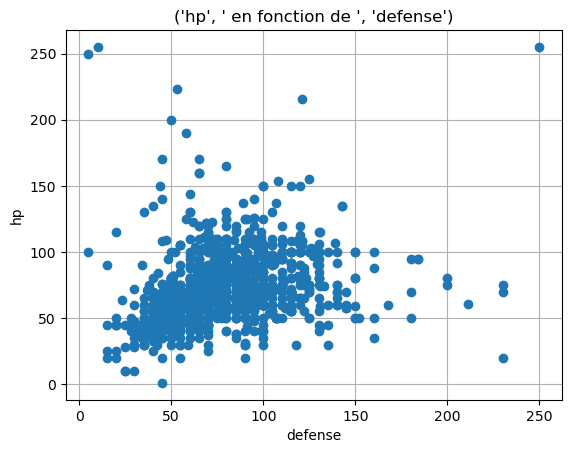

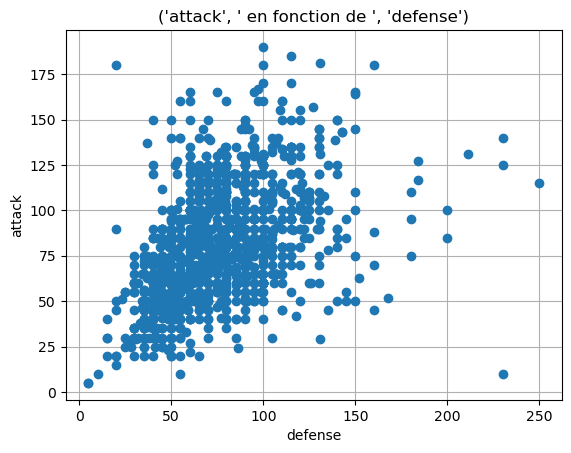

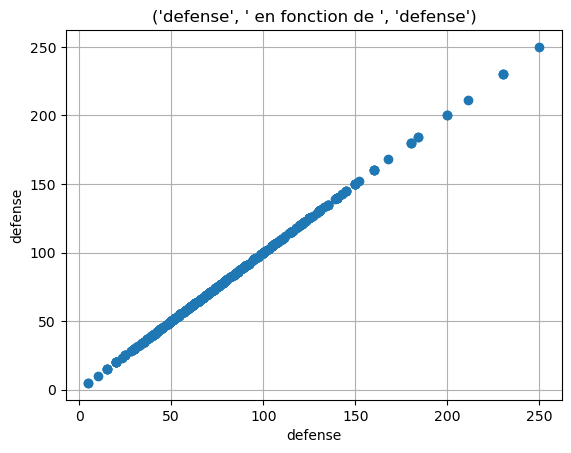

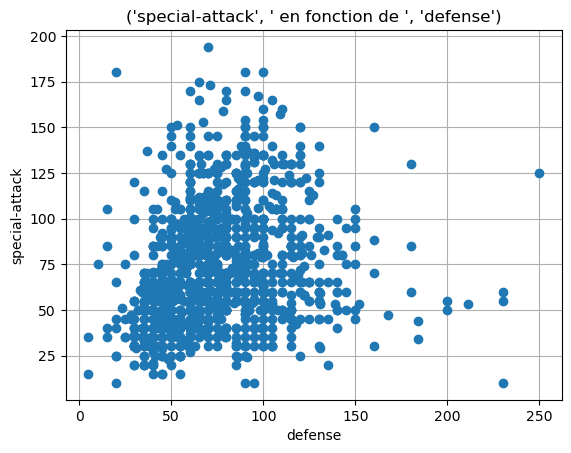

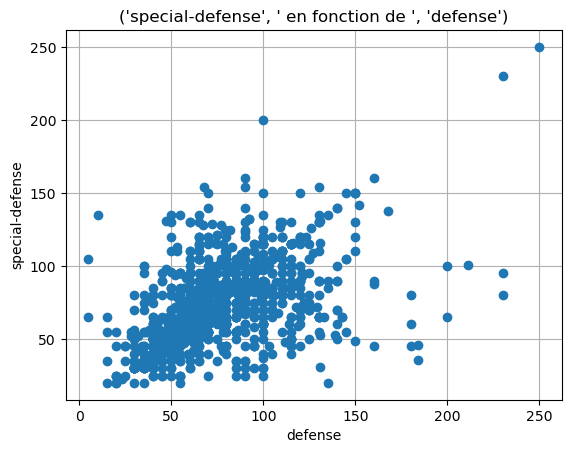

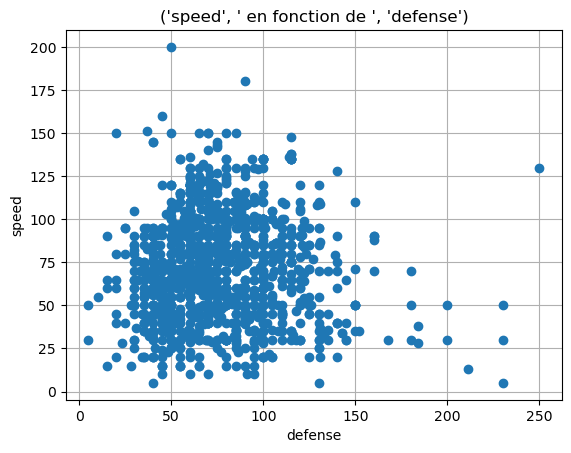

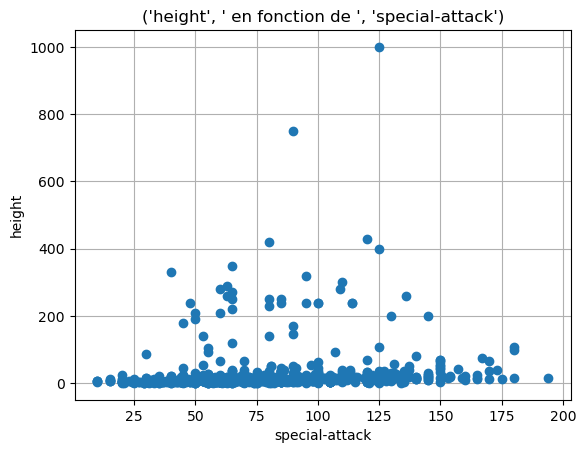

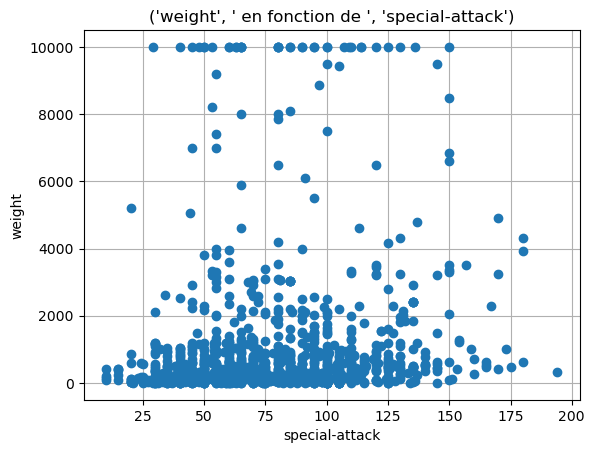

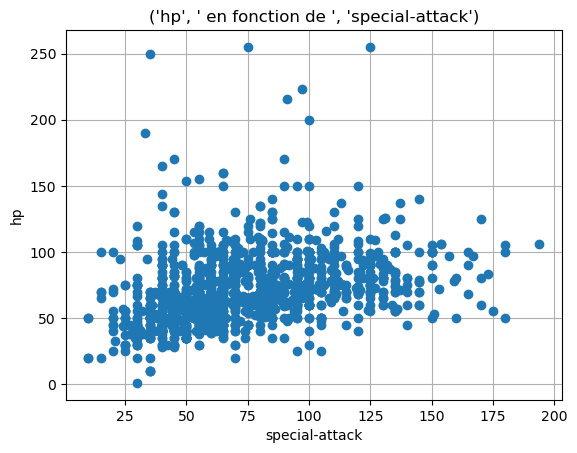

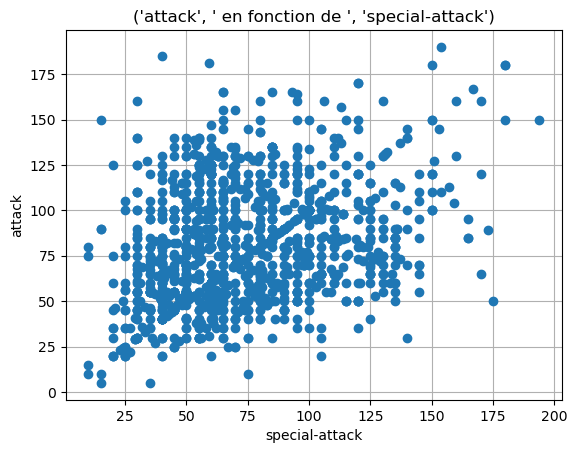

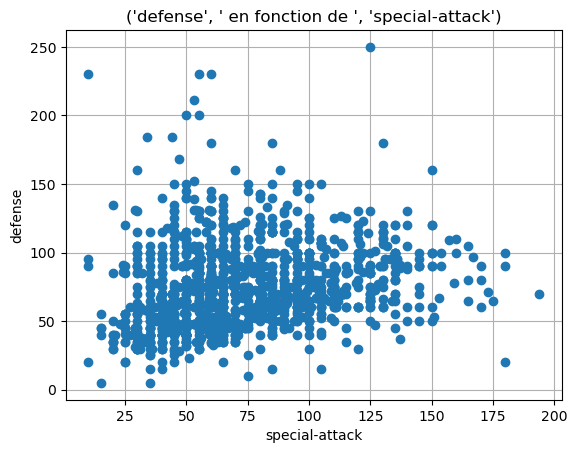

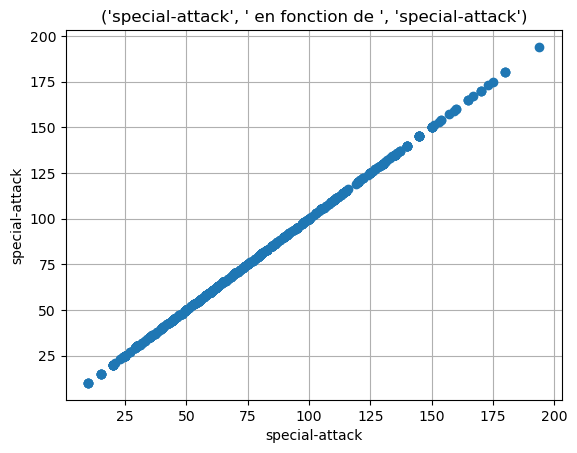

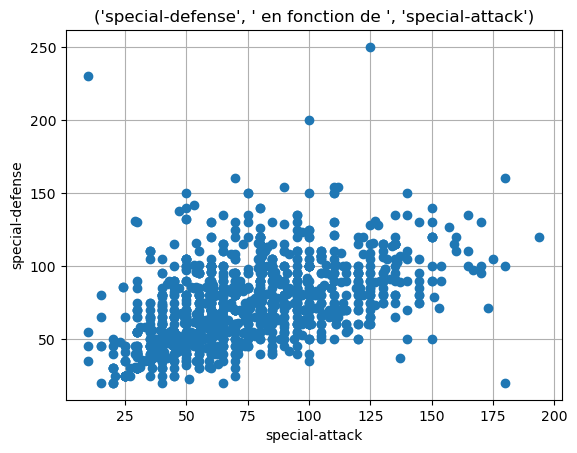

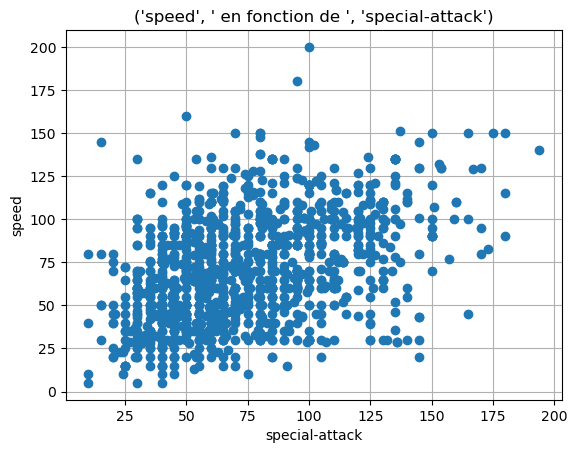

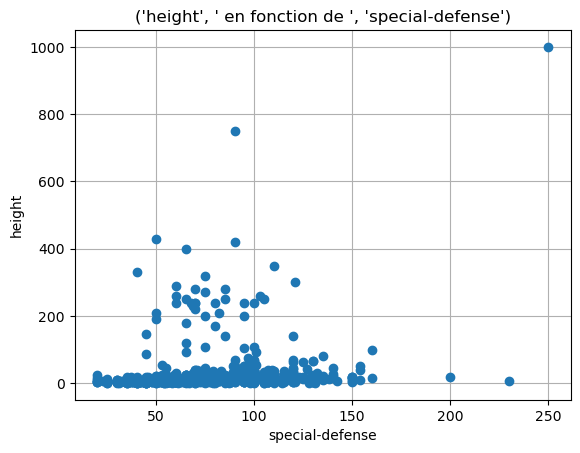

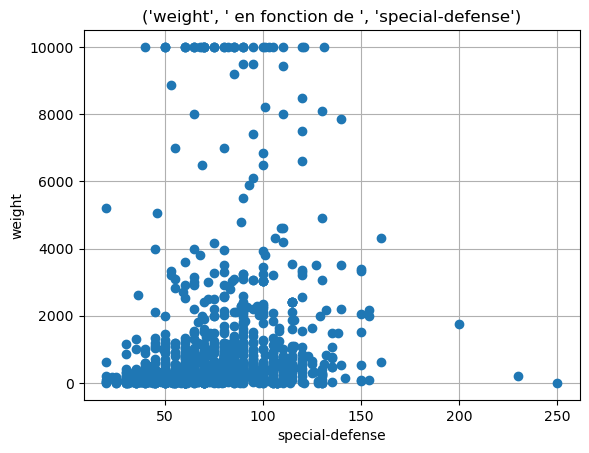

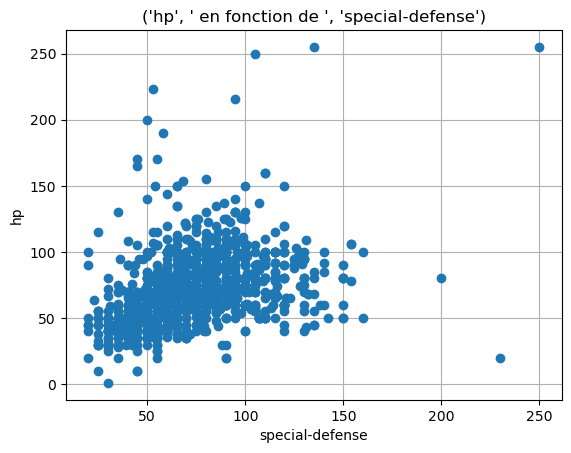

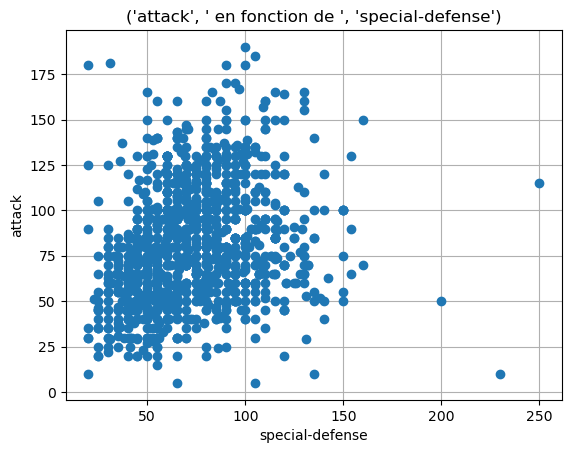

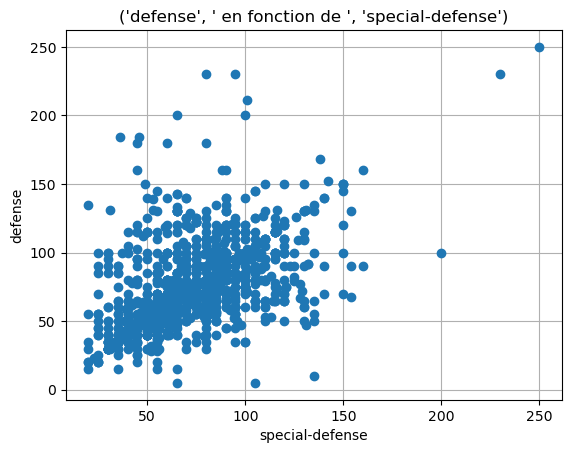

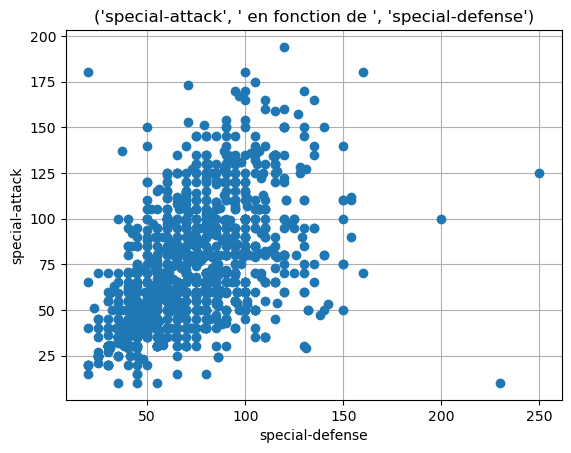

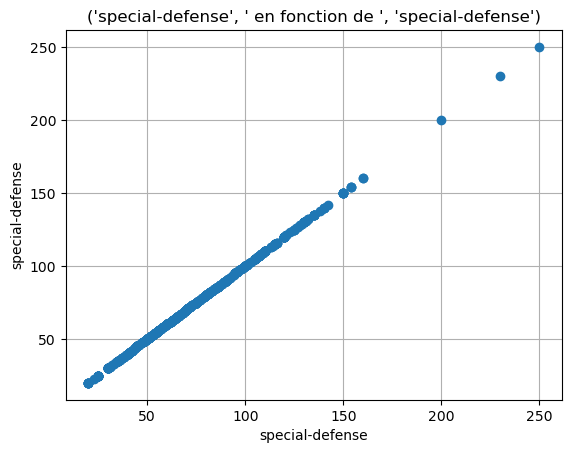

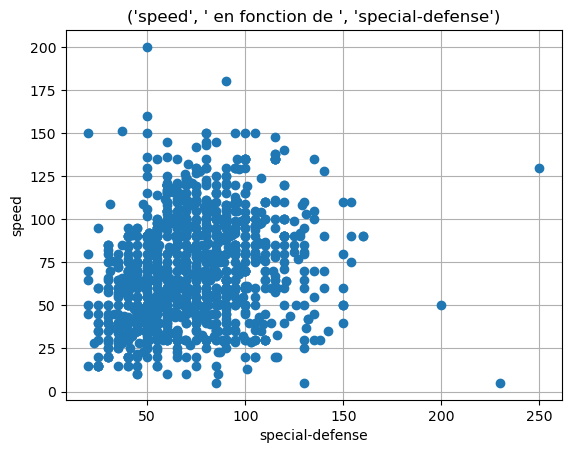

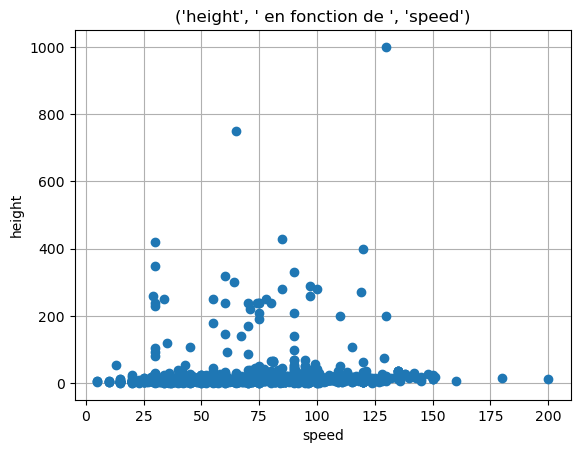

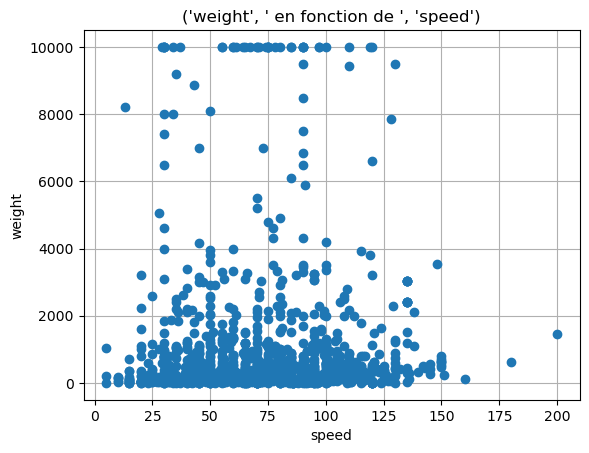

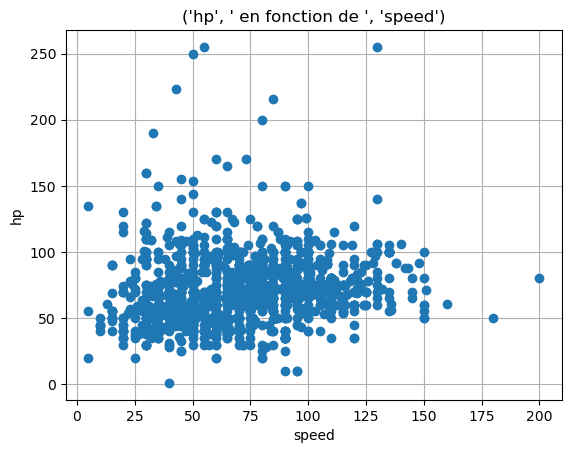

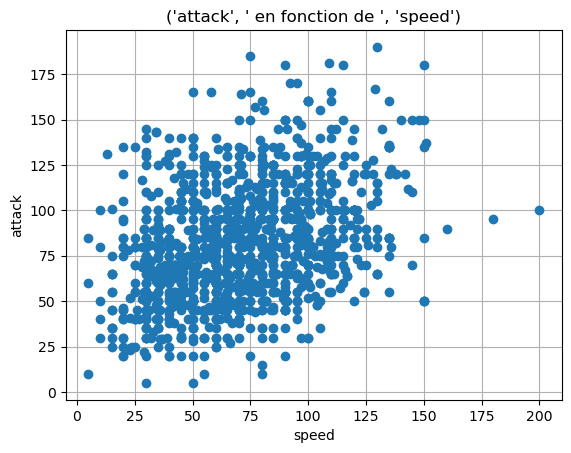

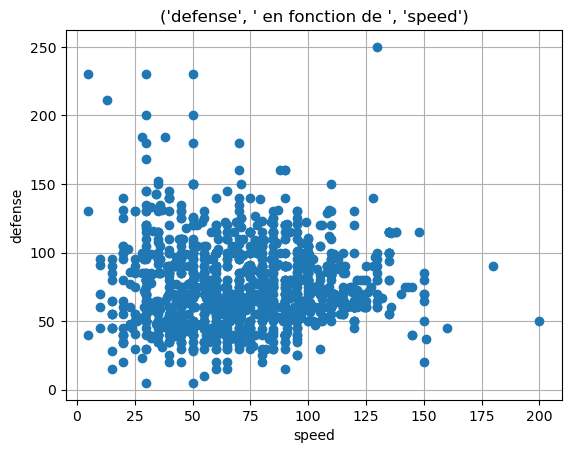

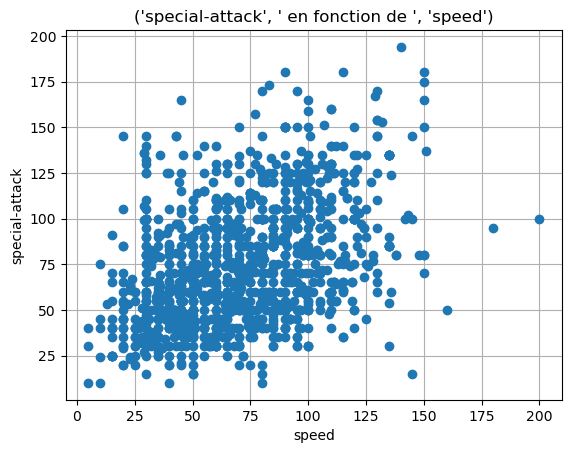

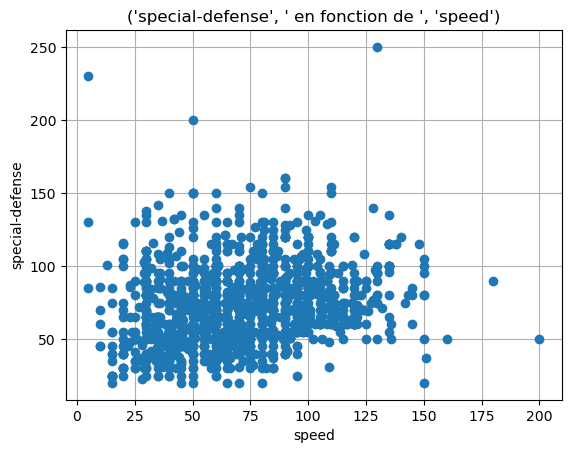

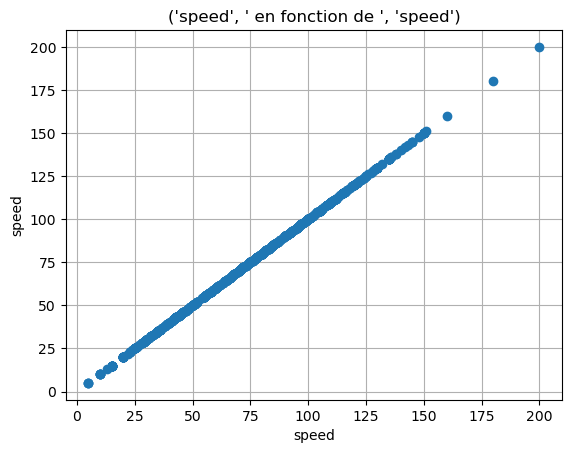

In [23]:
def pkmn_plot(att_1: str, att_2: str) -> None:
    plt.plot(df[att_1], df[att_2], marker='o', linestyle='None')
    plt.title((att_2, ' en fonction de ', att_1))
    plt.xlabel(att_1)
    plt.ylabel(att_2)
    plt.grid(True)
    plt.show()

df = df.drop('name', axis=1)
df = df.drop('type_1', axis=1)
df = df.drop('type_2', axis=1)

for col1 in df.columns:
    for col2 in df.columns:
        pkmn_plot(col1, col2)

# Linear regression

Coefficient (pente) : 0.02112134883380172
Intercept (ordonnée à l'origine) : 19.559280316141848


ValueError: x and y must be the same size

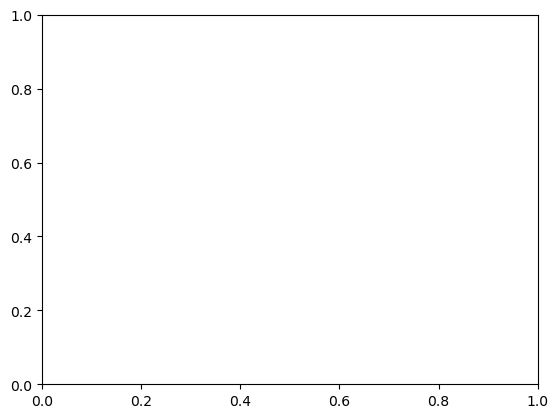

In [25]:
for col in df.columns:
    y = df[col]
    X = df.drop(col, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Afficher les coefficients
    print("Coefficient (pente) :", model.coef_[0])
    print("Intercept (ordonnée à l'origine) :", model.intercept_)
    
    # Visualiser les résultats
    plt.scatter(X, y, color='blue', label='Données réelles')
    plt.plot(X_test, y_pred, color='red', label='Prédictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()